<a href="https://colab.research.google.com/github/khethan123/general_python_code/blob/main/Introduction_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision

In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


let's start doing some basic operations using pytorch like making an activation function, generating random weights, bias and i/p features.

In [ ]:
def activation(x):
  """
  sigmoid activation fuction is used here
  to generate o/p b/w 0 and 1
  """
  return 1/(1+torch.exp(-x))

In [ ]:
### Generate some data
torch.manual_seed(42) # set the random seed so that things are predictable

# let features be 5 random normal variables.
features = torch.randn((1,5)) # returns a 2D matrix having normal dist values
print(features)

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229]])


normal distribution means the mean for this numbersdistribution is '0' and the std deviation os '1'

In [ ]:
# weights having same shape like features and also containing random values
weights = torch.randn_like(features)
print(weights)

tensor([[-0.1863,  2.2082, -0.6380,  0.4617,  0.2674]])


In [ ]:
# add a bias term
bias = torch.randn((1,1))

we generated the weights, bias and input features. Now let's calculate the o/p and apply activation function on the o/p.

In [ ]:
%%timeit
y = activation(torch.sum(features * weights) + bias)


45.6 µs ± 8.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit
#---- or ----#
y1 = activation((features*weights).sum() + bias)


32.6 µs ± 686 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


the above method is good. what about speed? Well ```torch.mm()``` or ```torch.matmul()``` is more faster when compared with the above operations but we must be careful while using matmul operations. why? basic rule of matrix multiplications is ```(m,n) * (n,p) = (m,p)``` i.e., n = n

In [ ]:
weights.shape

torch.Size([1, 5])

In [ ]:
%%timeit
# resizing the weights using .view() and using them
y = activation(torch.mm(features, weights.view(5,1)) + bias)


44.3 µs ± 8.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Okay!, let's try stacking more layers and doing the same as above.

In [ ]:
### Generate some data
torch.manual_seed(7)  # set the random seed so  things are predictable

# Features are 3 random normal variables
features = torch.randn((1,3))

# Define the size of each layer in our network.
# i/p layer
n_input = features.shape[1] # no. of i/p units, must match no. of i/p features
# hidden layer
n_hidden = 2                # no. of hidden units
# o/p layer
n_output = 1                # no.of o/p units

# weights for input to hidden layer
W1 = torch.randn(n_input, n_hidden)
# weights for hidden to o/p layer
W2 = torch.randn(n_hidden, n_output)

# bias termfor hidden and output layers
B1 = torch.randn(1, n_hidden)
B2 = torch.randn(1, n_output)


In [ ]:
# using activation on both layers doesn't mean it's compulsory
# here we used it just for checking.
L1 = activation(torch.mm(features, W1) + B1)
L2 = activation(torch.mm(L1, W2) + B2)
print(L2)

tensor([[0.3171]])


BONUS!! PyTorch allows converting b/w numpy arrays and torch tensors.
tensor from numpy array -> ```torch.fom_numpy()```
numpy array from tensor -> ```tensor.numpy()```

In [ ]:
import numpy as np

a = np.random.randn(4,3)
print(a)

[[ 0.35099547 -0.93442363  0.65758586]
 [-1.933035   -0.88403665 -0.06062136]
 [-1.58156596 -0.13884732 -0.33750627]
 [-1.8080006   0.45605693 -0.43899142]]


In [ ]:
b = torch.from_numpy(a)
b

tensor([[ 0.3510, -0.9344,  0.6576],
        [-1.9330, -0.8840, -0.0606],
        [-1.5816, -0.1388, -0.3375],
        [-1.8080,  0.4561, -0.4390]], dtype=torch.float64)

In [ ]:
b.numpy()
"""
b.numpy() will bot change the value of b.
b will remain as a tensor even after this operation.
"""

array([[ 0.35099547, -0.93442363,  0.65758586],
       [-1.933035  , -0.88403665, -0.06062136],
       [-1.58156596, -0.13884732, -0.33750627],
       [-1.8080006 ,  0.45605693, -0.43899142]])

In [ ]:
"""
Also note that a (array) = b (tensor) i.e., see the above o/ps for a and b
and it will be clear that they actually share the memory.
so if we change the values in-place of one object, the other will change
as well. similar to list operations.
"""

'\nAlso note that a (array) = b (tensor) i.e., see the above o/ps for a and b\nand it will be clear that they actually share the memory.\nso if we change the values in-place of one object, the other will change \nas well. similar to list operations.\n'

In [ ]:
b.mul_(2) # in-place multiply by 2

tensor([[ 0.7020, -1.8688,  1.3152],
        [-3.8661, -1.7681, -0.1212],
        [-3.1631, -0.2777, -0.6750],
        [-3.6160,  0.9121, -0.8780]], dtype=torch.float64)

In [ ]:
a

array([[ 0.70199094, -1.86884725,  1.31517173],
       [-3.86607   , -1.76807331, -0.12124272],
       [-3.16313192, -0.27769464, -0.67501253],
       [-3.6160012 ,  0.91211385, -0.87798284]])

# **Let's use MNIST dataset now to build a neural network and classify the images.**

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import matplotlib.pyplot as plt

In [ ]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
from torchvision import datasets, transforms

# Define a transform to normalize the data to prepare the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 85768210.59it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 34819112.91it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 22159074.27it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5050511.34it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [ ]:
dataiter = iter(trainloader) # to make it an iterator like for loop
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


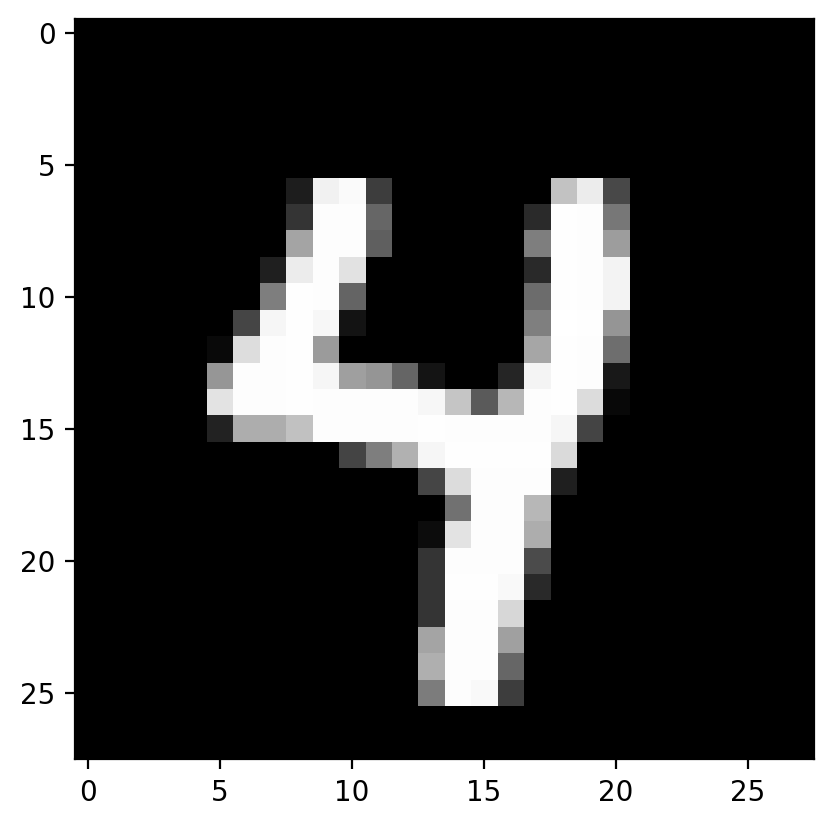

In [ ]:
plt.imshow(images[9].numpy().squeeze(), cmap='Greys_r')

our images data is basically a 4D tensor which is not uselful for 2D matrix calculations so we reshape the images dataset.

In [ ]:
images.view((64,784))

#  or images.view(images.shape[0], -1)
# the above code also performs the same as previous one
# use it when we do not know the size of i/p image

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

**let's manually try building a neural network first.**
It has 3 layers ```i/p => (64, 784)```, ```hidden_layer => (784, 256)```, ```o/p => (256, 10)```

In [ ]:
### Generate some data
torch.manual_seed(7)  # set the random seed so  things are predictable

# Define the size of each layer in our network.
# i/p layer
n_input = 784  # no. of i/p units, must match no. of i/p features
# hidden layer
n_hidden = 256                # no. of hidden units
# o/p layer
n_output = 10               # no.of o/p units

# weights for input to hidden layer
W_mnist_1 = torch.randn(n_input, n_hidden)
# weights for hidden to o/p layer
W_mnist_2 = torch.randn(n_hidden, n_output)

# bias termfor hidden and output layers
B_mnist_1 = torch.randn(1, n_hidden)
B_mnist_2 = torch.randn(1, n_output)

In [ ]:
L_mnist_1 = activation(torch.mm(images.view((64,784)), W_mnist_1) + B_mnist_1)
L_mnist_2 = (torch.mm(L_mnist_1, W_mnist_2) + B_mnist_2)

print(L_mnist_2.shape)

torch.Size([64, 10])


In [ ]:
def softmax(x):
  """
  gives a proper probability distribution
  where the probabilites sum up to one.
  dim =1 means adding all values in a row.
  (64, 10) / (10, 1) => (64, 1)"""

  return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

In [ ]:
out = L_mnist_2
probabilities = softmax(out)
print(probabilities.shape)
print(torch.sum(probabilities.sum(dim=1))/64)

torch.Size([64, 10])
tensor(1.)


In [ ]:
from torch import nn
import torch.nn.functional as F

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # x1w1 + x2w2 + ... + xnwn + b = linear transformation
    # linear transformations so use linear layer
    self.hidden = nn.Linear(784, 256)
    self.output = nn.Linear(256, 10)

    # activation functions
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward_pass(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)

    return x

In [ ]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [ ]:
model_out = model.forward_pass(images.view(64, 784))


In [ ]:
print(model_out.shape)

torch.Size([64, 10])


**The above code has no errors but we can define the network somewhat more concisely and clearly using ```torch.nn.functional``` module.**

In [ ]:
class NewNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256, 10)

  def forward_pass(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim=1)

    return x

In [ ]:
model_1 = NewNetwork()
model_1

NewNetwork(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

# Multiple neural networks.

In [ ]:
class MultipleNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x))

    return x

In [ ]:
model_2 = MultipleNetwork()
model_2

MultipleNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
print(model_2.fc1.weight)
print(model_2.fc1.bias)

Parameter containing:
tensor([[ 0.0037, -0.0326, -0.0192,  ..., -0.0349,  0.0259,  0.0161],
        [-0.0220, -0.0092,  0.0267,  ..., -0.0161,  0.0141, -0.0044],
        [-0.0064, -0.0073, -0.0031,  ...,  0.0184, -0.0096,  0.0041],
        ...,
        [ 0.0060,  0.0094, -0.0092,  ..., -0.0041,  0.0043,  0.0321],
        [ 0.0072,  0.0201, -0.0352,  ...,  0.0153,  0.0339, -0.0236],
        [-0.0058, -0.0033,  0.0309,  ...,  0.0168,  0.0218, -0.0037]],
       requires_grad=True)
Parameter containing:
tensor([-3.5140e-02, -1.8390e-02,  6.8961e-03, -6.9769e-03,  2.4835e-02,
         1.9385e-02, -3.0230e-02, -1.4221e-02,  3.2151e-02,  3.1239e-02,
        -1.7553e-02,  3.0973e-02,  5.0422e-03,  2.2563e-02, -1.0080e-02,
        -1.6343e-02,  2.3792e-02,  2.4730e-02, -3.9857e-03,  2.1657e-03,
        -2.8466e-02, -8.3228e-03,  2.9120e-02,  2.1403e-02, -2.9136e-02,
         1.0794e-02,  3.0851e-02, -2.9646e-02, -1.3545e-03,  1.0354e-02,
        -2.0239e-02, -3.4332e-03,  4.5024e-03,  1.9264e-0

In [ ]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

<ipython-input-62-6cd898906be9>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


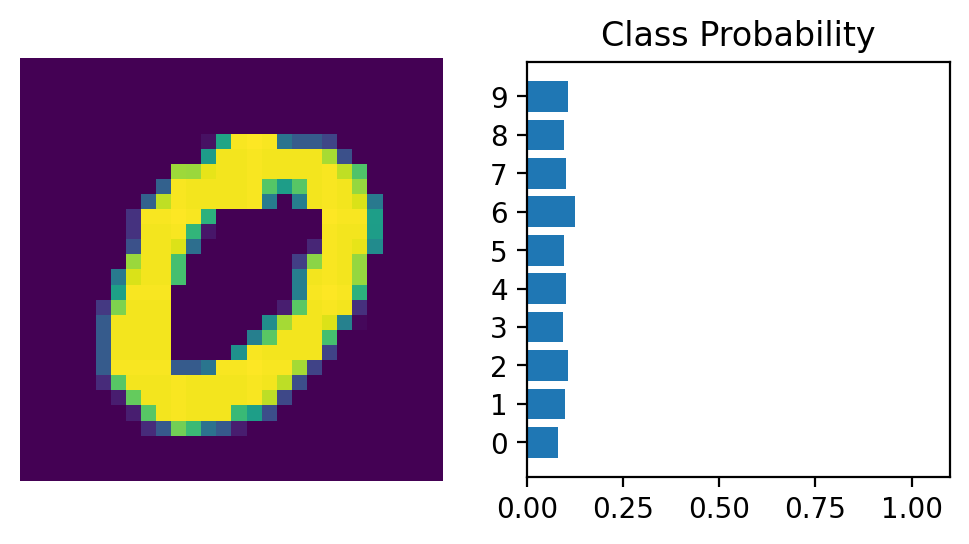

In [ ]:


# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model_2.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!
Instead of creating a class we can also use ```nn.Sequential```. the code basically looks like below.

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


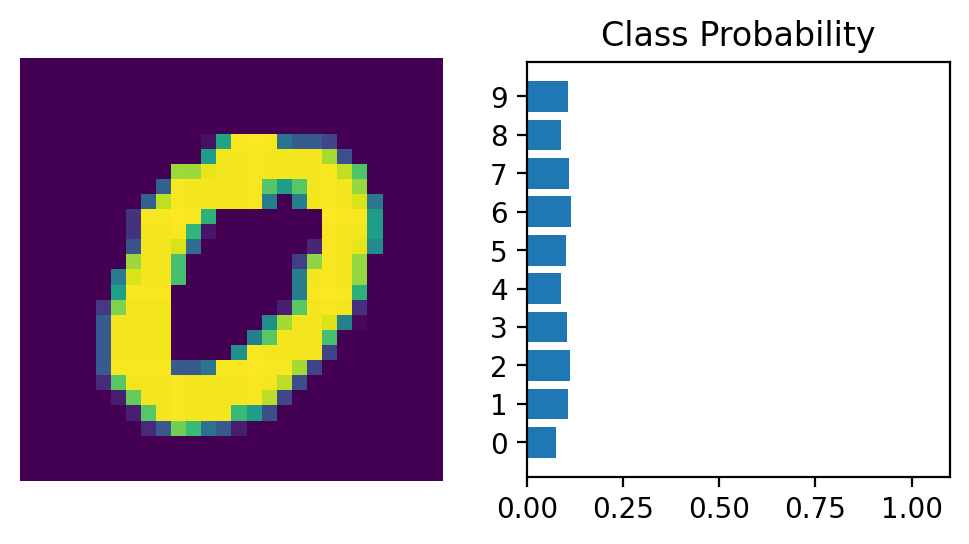

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

But again we didn't train the model yet! so its understandable. But we did reduce the code and made it much more concise and easy to understand. Not to forget, the layers in ```nn.Sequential``` are always executed in the order they were first defined.

# **Let's Train our model now and see how it performs.**

In [ ]:
# build a feed-forward network
train_model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

# we didn't include softmax at last layer because we are calc loss

In [ ]:
# softmax is included in cross entropy loss so don't use in train_model
criterion = nn.CrossEntropyLoss()

# flatten images
images = images.view(images.shape[0], -1)

# forward pass, get our scores/logits from model
logits = train_model(images)

# calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3296, grad_fn=<NllLossBackward0>)


let's try the above again but this time let's create  a model which has the last function as ```log_softmax()```

In [ ]:
# build a feed-forward network
train_model_2 = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim = 1)
)
# logsoftmax is included so use neg log likelihood loss
criterion_2 = nn.NLLLoss()

logits_2 = train_model_2(images)
# calculate the loss with the logits and the labels
loss = criterion_2(logits_2, labels)

print(loss)

tensor(2.2899, grad_fn=<NllLossBackward0>)


When we create a network with PyTorch, all of the parameters are initialized with ```requires_grad = True```. This means that when we calculate the loss and call ```loss.backward()```, the gradients for the parameters are calculated. These gradients are used to update the weights with gradient descent.

In [ ]:
print('Before backward pass: \n', train_model_2[0].weight.grad)
loss.backward()
print('After backward pass: \n', train_model_2[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0034,  0.0034,  0.0034,  ...,  0.0034,  0.0034,  0.0034],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        ...,
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


*A small example to show how gradients are calculated using backward()*

In [ ]:
x = torch.tensor([[2.0,4.0], [6.0,8.0]], requires_grad = True)
print(x)

tensor([[2., 4.],
        [6., 8.]], requires_grad=True)


In [ ]:
y = x**2
print(y)

tensor([[ 4., 16.],
        [36., 64.]], grad_fn=<PowBackward0>)


In [ ]:
z = y.mean()
print(z)

tensor(30., grad_fn=<MeanBackward0>)


In [ ]:
print(x.grad, y.grad)

None None


<ipython-input-79-c2a96e82db45>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(x.grad, y.grad)


In [ ]:
z.backward()

In [ ]:
print(x.grad)
print(x/2)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], grad_fn=<DivBackward0>)


**Start the training!**

In [ ]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate

In [ ]:
## Training for real

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)



epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()

        # Training pass
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9352688296263152
Training loss: 0.8813958451755519
Training loss: 0.5384055214332365
Training loss: 0.4403954380388453
Training loss: 0.394772467280883


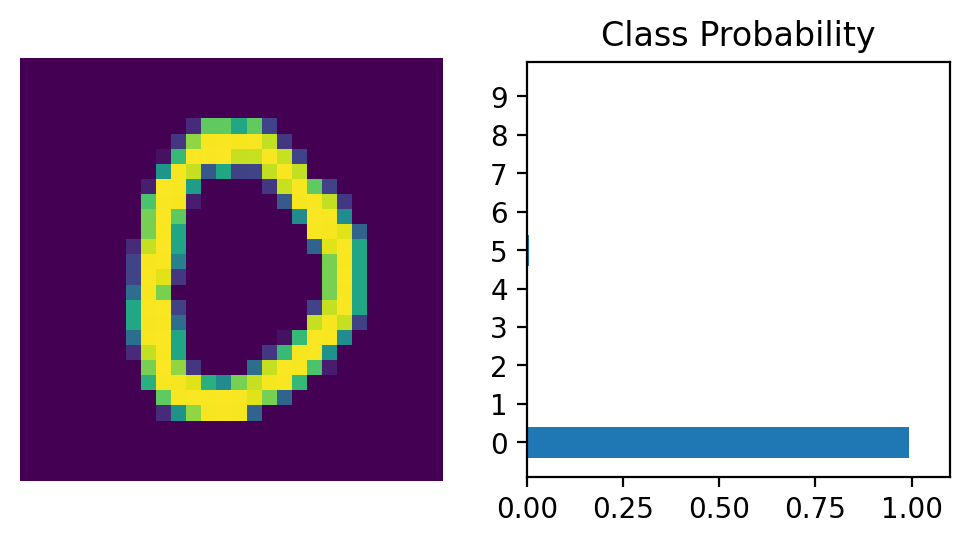

In [ ]:
%matplotlib inline

dataiter = iter(trainloader)
images, labels = next(dataiter)

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
prediction = torch.exp(logps)
view_classify(img.view(1, 28, 28), prediction)

Uncomment the below code to run the entire model from loading to training to testing.

In [ ]:
# ### ok let's write the code now from top to bottom.
# #--- necessary libraries ---#
# import torch
# from torch import nn
# from torchvision import datasets, transforms
# from torch import optim

# import numpy as np

# import matplotlib.pyplot as plt

# from six.moves import urllib

# #--- download, prepare the data ---#
# opener = urllib.request.build_opener()
# opener.addheaders = [('User-agent', 'Mozilla/5.0')]
# urllib.request.install_opener(opener)

# # Define a transform to normalize the data to prepare the data
# transform = transforms.Compose([transforms.ToTensor(),
#                               transforms.Normalize((0.5,), (0.5,)),
#                               ])

# # Download and load the training data
# trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True,
#                           train=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
#                                           shuffle=True)

# #--- Create a training model ---#
# model = nn.Sequential(
#     nn.Linear(784,128),
#     nn.ReLU(),
#     nn.Linear(128,64),
#     nn.ReLU(),
#     nn.Linear(64, 10),
#     nn.LogSoftmax(dim = 1)
# )

# criterion = nn.NLLLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.003)

# #--- Start the training ---#
# epoch = 10
# for i in range(epoch):
#   running_loss = 0
#   for images, labels in trainloader:

#     # images flattening
#     images = images.view(images.shape[0], -1)

#     # removing previous gradients
#     optimizer.zero_grad()

#     # calculating loss and updating gradients
#     output = model(images)
#     loss = criterion(output, labels)
#     loss.backward()
#     optimizer.step()

#     running_loss += loss.item()
#   else:
#     print(f"Training loss: {running_loss/len(trainloader)}")


# #--- A class which helps in visualizing data ---#
# def view_classify(img, ps, version="MNIST"):
#     ''' Function for viewing an image and it's predicted classes.
#     '''
#     ps = ps.data.numpy().squeeze()

#     fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
#     ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
#     ax1.axis('off')
#     ax2.barh(np.arange(10), ps)
#     ax2.set_aspect(0.1)
#     ax2.set_yticks(np.arange(10))
#     if version == "MNIST":
#         ax2.set_yticklabels(np.arange(10))
#     elif version == "Fashion":
#         ax2.set_yticklabels(['T-shirt/top',
#                             'Trouser',
#                             'Pullover',
#                             'Dress',
#                             'Coat',
#                             'Sandal',
#                             'Shirt',
#                             'Sneaker',
#                             'Bag',
#                             'Ankle Boot'], size='small');
#     ax2.set_title('Class Probability')
#     ax2.set_xlim(0, 1.1)

# #--- testing the trained model ---#
# dataiter = iter(trainloader)
# images, labels = next(dataiter)

# img = images[0].view(1, 784)
# # Turn off gradients to speed up this part
# with torch.no_grad():
#     logps = model(img)

# # Output of the network are log-prob, need to take exp for prob
# prediction = torch.exp(logps)
# view_classify(img.view(1, 28, 28), prediction)